In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import os
import imageio as io
import cv2
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from skimage import data
from skimage.color import rgb2gray

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
datadir = '/content/drive/MyDrive/ColabNotebooks/flowers'
categories = ['rrose','rtulip', 'rsunflower']

In [58]:
label = []
images = []
flat_data = []
dim = 100

def create_training_data():
    for category in categories:
        class_num = categories.index(category)
        path = os.path.join(datadir,category)
        
        for img in os.listdir(path):
            if img.endswith('.jpg'):
                try:
                    img_array = io.imread(os.path.join(path,img))
                    img_resized = resize(img_array,(dim, dim))
                    cv2.waitKey(0)
                    img_resized = np.array(img_resized, dtype=np.uint8)
                    gray_image = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
                    img_resized.mean();
                    flat_data.append(gray_image)
                    label.append(class_num)
                except (IOError, SyntaxError) as e:
                    print('Bad file:', img)

create_training_data()
flat_data = np.array(flat_data)
label = np.array(label)

In [59]:
# flat_data = pd.DataFrame(flat_data)
x, y, z = flat_data.shape
flat_data = flat_data.reshape((x, y*z))

In [60]:
label = pd.DataFrame(label)
label

,0
0,0
1,0
2,0
3,0
4,0
...,...
295,2
296,2
297,2
298,2


In [61]:
from sklearn.decomposition import PCA

pca = PCA()
flat_data = pca.fit_transform(flat_data)

flat_data.shape

(300, 300)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, label, test_size=0.10, random_state=40)

# Linear regression 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear = LinearRegression()
linear = linear.fit(x_train, y_train)

y_pred_linear = linear.predict(x_test)

linear_model = linear.score(x_test, y_test)
linear.score(x_test, y_test)

0.1891781040223235

In [64]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,np.asarray(y_pred_linear,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_linear,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_linear,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_linear,dtype="int")))

[[ 4  4  0]
 [ 0 11  0]
 [ 0 11  0]]
              precision    recall  f1-score   support

           0      1.000     0.500     0.667         8
           1      0.423     1.000     0.595        11
           2      0.000     0.000     0.000        11

    accuracy                          0.500        30
   macro avg      0.474     0.500     0.420        30
weighted avg      0.422     0.500     0.396        30

r2_score =  0.19786096256684516
accuracy =  0.5


# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression  

lor = LogisticRegression()  
lor.fit(x_train, y_train)  

y_pred_lor = lor.predict(x_test)  
lor_model = lor.score(x_test, y_test)

lor.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.26666666666666666

In [66]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,np.asarray(y_pred_lor,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_lor,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_lor,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_lor,dtype="int")))

[[ 8  0  0]
 [11  0  0]
 [11  0  0]]
              precision    recall  f1-score   support

           0      0.267     1.000     0.421         8
           1      0.000     0.000     0.000        11
           2      0.000     0.000     0.000        11

    accuracy                          0.267        30
   macro avg      0.089     0.333     0.140        30
weighted avg      0.071     0.267     0.112        30

r2_score =  -1.9411764705882342
accuracy =  0.26666666666666666


# SVM

In [67]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)  

svc_model = svc.score(x_test, y_test)

svc.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.26666666666666666

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


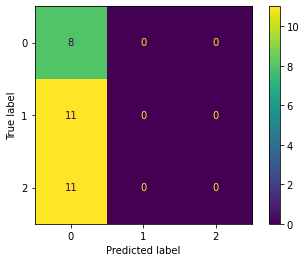

In [68]:
plot_confusion_matrix(svc, x_test, y_test)  
plt.show()

In [69]:
from sklearn import metrics


print(metrics.confusion_matrix(y_test,np.asarray(y_pred_svc,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_svc,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_svc,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_svc,dtype="int")))

[[ 8  0  0]
 [11  0  0]
 [11  0  0]]
              precision    recall  f1-score   support

           0      0.267     1.000     0.421         8
           1      0.000     0.000     0.000        11
           2      0.000     0.000     0.000        11

    accuracy                          0.267        30
   macro avg      0.089     0.333     0.140        30
weighted avg      0.071     0.267     0.112        30

r2_score =  -1.9411764705882342
accuracy =  0.26666666666666666


# Decision Tree classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier  

dtc = DecisionTreeClassifier(criterion = 'entropy')  
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

dtc_model = dtc.score(x_test, y_test)

dtc.score(x_test, y_test)

0.26666666666666666

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


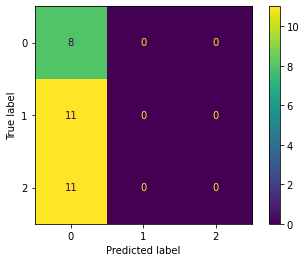

In [71]:
plot_confusion_matrix(dtc, x_test, y_test)  
plt.show()

In [72]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,np.asarray(y_pred_dtc,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_dtc,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_dtc,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_dtc,dtype="int")))

[[ 8  0  0]
 [11  0  0]
 [11  0  0]]
              precision    recall  f1-score   support

           0      0.267     1.000     0.421         8
           1      0.000     0.000     0.000        11
           2      0.000     0.000     0.000        11

    accuracy                          0.267        30
   macro avg      0.089     0.333     0.140        30
weighted avg      0.071     0.267     0.112        30

r2_score =  -1.9411764705882342
accuracy =  0.26666666666666666


# Random forest classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier  

rfc = RandomForestClassifier(n_estimators= 1000, criterion="entropy")  
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test) 
rfc_model = rfc.score(x_test, y_test)

rfc.score(x_test, y_test)

<ipython-input-73-833b0b222e4c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


0.26666666666666666

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


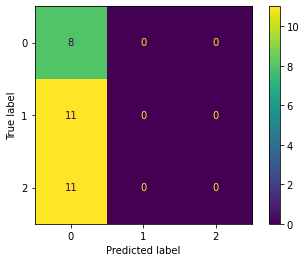

In [74]:
plot_confusion_matrix(rfc, x_test, y_test)  
plt.show()

In [75]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,np.asarray(y_pred_rfc,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_rfc,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_rfc,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_rfc,dtype="int")))

[[ 8  0  0]
 [11  0  0]
 [11  0  0]]
              precision    recall  f1-score   support

           0      0.267     1.000     0.421         8
           1      0.000     0.000     0.000        11
           2      0.000     0.000     0.000        11

    accuracy                          0.267        30
   macro avg      0.089     0.333     0.140        30
weighted avg      0.071     0.267     0.112        30

r2_score =  -1.9411764705882342
accuracy =  0.26666666666666666


# Lasso 

In [76]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)

y_pred_lasso = lasso.predict(x_test)

# np.sqrt(mean_squared_error(y_pred_lasso, y_test))

lasso_model = lasso.score(x_test, y_test)

lasso.score(x_test, y_test)

-0.021922043457402562

In [77]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,np.asarray(y_pred_lasso,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_lasso,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_lasso,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_lasso,dtype="int")))

[[ 8  0  0]
 [11  0  0]
 [11  0  0]]
              precision    recall  f1-score   support

           0      0.267     1.000     0.421         8
           1      0.000     0.000     0.000        11
           2      0.000     0.000     0.000        11

    accuracy                          0.267        30
   macro avg      0.089     0.333     0.140        30
weighted avg      0.071     0.267     0.112        30

r2_score =  -1.9411764705882342
accuracy =  0.26666666666666666


# Ridge 

In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.5, normalize = False, tol = 0.01, solver ='auto')
ridge.fit(x_train, y_train)
  
y_pred_ridge = ridge.predict(x_test)

ridge_model = ridge.score(x_test, y_test)

ridge.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


-0.025761893931045776

In [79]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,np.asarray(y_pred_ridge,dtype="int")))
print(metrics.classification_report(y_test,np.asarray(y_pred_ridge,dtype="int"),digits=3,zero_division=0))
print("r2_score = ",metrics.r2_score(y_test,np.asarray(y_pred_ridge,dtype="int")))
print("accuracy = ",metrics.accuracy_score(y_test, np.asarray(y_pred_ridge,dtype="int")))

[[ 8  0  0]
 [11  0  0]
 [11  0  0]]
              precision    recall  f1-score   support

           0      0.267     1.000     0.421         8
           1      0.000     0.000     0.000        11
           2      0.000     0.000     0.000        11

    accuracy                          0.267        30
   macro avg      0.089     0.333     0.140        30
weighted avg      0.071     0.267     0.112        30

r2_score =  -1.9411764705882342
accuracy =  0.26666666666666666


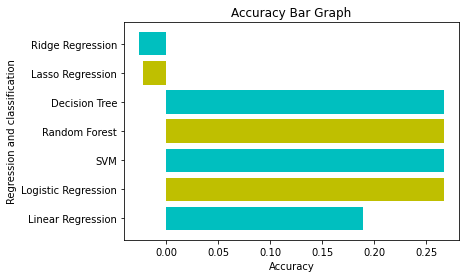

In [80]:
x = ['Linear Regression','Logistic Regression','SVM','Random Forest','Decision Tree',
     'Lasso Regression','Ridge Regression']
y = [linear_model,lor_model, svc_model, rfc_model, dtc_model,lasso_model, ridge_model]
plt.barh(x,y,color=['c','y'])
plt.xlabel('Accuracy')
plt.ylabel('Regression and classification')
plt.title('Accuracy Bar Graph')

plt.show()